<h2 style="text-align:center;">Welcome to the fourth laboratory work in this course</h2>
<h4 style="text-align:center;">This laboratory work is graded</h4>

<span style="color:#011f4b; font-size:15px"><b>The goal</b> of the laboratory work - is to start data preprocessing process 
<br/>
<b>Learning outcomes:</b>
* to be able to explore data distributions
* to handle missing values
</span>
<br/><br/>
<span style="color:#011f4b;">
Your task is to complete this laboratory work within 80 minutes and submit the .ipynb file to DL "Laboratory03". 
<br/>
<b>Pay attention to the file name - your file should be named as "Laboratory_work_04_Yoursurname_YourName_yourgroup".</b> In case you didn't name your file properly (as showed before) <b>-5% penalty</b> will be applied.
</span>

<hr>

<span style="color:#011f4b">Because data is often taken from multiple sources which are normally not too reliable and that too in different formats, more than half our time is consumed in dealing with data quality issues when working on a machine learning problem. It is simply unrealistic to expect that the data will be perfect. There may be problems due to human error, limitations of measuring devices, or flaws in the data collection process.

<span style="color:#011f4b"><b> <b><span style="font-size:20px; color:orange">T</span>his laboratory class is focused on your individual work</b>. So you will not be provided with examples, almost.
    <span style="color:#00a0e5"> Данная лабораторная работа более самостоятельная</span>
<br/><br/>
Now, let's go to practice </span>

<b>First things first,</b> import <code><b>matplotlib</b></code>, <code><b>pandas</b></code> and <code><b>numpy</b></code>packages to your notebook. 
<br/> Simply uncomment the cell below:

<p style="text-align:right; color:#1460AA;">+2
    points </p>

In [1]:
# Run this cell - Запустите эту ячейку SHFT+Enter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

<b>Inline</b> your matplotlib

In [2]:
#Run this cell - Запустите эти ячейки SHFT+Enter
%matplotlib inline

<p style="text-align:right; color:#1460AA;">+2
    points </p>

In [3]:
# Run this cell - Запустите эти ячейки SHFT+Enter
dataset = pd.read_csv("House_prices.csv")
dataset.head(10)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,Neighborhood,HouseStyle,OverallQual,...,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,BedroomAbvGr,KitchenAbvGr,PoolArea,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,CollgCr,2Story,7,...,Ex,Y,SBrkr,856,854,3,1,0,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,Veenker,1Story,6,...,Ex,Y,SBrkr,1262,0,3,1,0,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,CollgCr,2Story,7,...,Ex,Y,SBrkr,920,866,3,1,0,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Crawfor,2Story,7,...,Gd,Y,SBrkr,961,756,3,1,0,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,NoRidge,2Story,8,...,Ex,Y,SBrkr,1145,1053,4,1,0,Normal,250000
5,50,RL,14115,Pave,IR1,Lvl,AllPub,Mitchel,1.5Fin,5,...,Ex,Y,SBrkr,796,566,1,1,0,Normal,143000
6,20,RL,10084,Pave,Reg,Lvl,AllPub,Somerst,1Story,8,...,Ex,Y,SBrkr,1694,0,3,1,0,Normal,307000
7,60,RL,10382,Pave,IR1,Lvl,AllPub,NWAmes,2Story,7,...,Ex,Y,SBrkr,1107,983,3,1,0,Normal,200000
8,50,RM,6120,Pave,Reg,Lvl,AllPub,OldTown,1.5Fin,7,...,Gd,Y,FuseF,1022,752,2,2,0,Abnorml,129900
9,190,RL,7420,Pave,Reg,Lvl,AllPub,BrkSide,1.5Unf,5,...,Ex,Y,SBrkr,1077,0,2,2,0,Normal,118000


So, here we see that you will work with dataset about House Prices and conditions. (<span style="color:#00a0e5">Сегодня вы работаете с данными о продаже домов и их состояния а момент продажи</span>)

Here, you can see the description for this dataset (<span style="color:#00a0e5">Для понимания здесь вы найдете описание фич</span>)

* SalePrice: the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotArea: Lot size in square feet
* Street: Type of road access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* Neighborhood: Physical locations within Ames city limits
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* ExterQual: Exterior material quality
* Foundation: Type of foundation
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* BedroomAbvGr: Number of bedrooms above garage
* KitchenAbvGr: Number of kitchens above garage
* PoolArea: Pool area in square feet
* SaleCondition: Condition of sale

<h3>TASK 1: Data observation </h3>

<b>Task 1.1 </b> Take a closer look to your column values. Use <code>dataset.info()</code> (<span style="color:#00a0e5"> Самое время понять с какими данными вы будете работать, используйте указанные методы чтобы иметь общее представление о данных.</span>)

<p style="text-align:right; color:#1460AA;">+10
    points </p>

In [4]:
# Your code goes here
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   LotArea        1460 non-null   int64 
 3   Street         1460 non-null   object
 4   LotShape       1460 non-null   object
 5   LandContour    1460 non-null   object
 6   Utilities      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   HouseStyle     1460 non-null   object
 9   OverallQual    1460 non-null   int64 
 10  OverallCond    1460 non-null   int64 
 11  YearBuilt      1460 non-null   int64 
 12  YearRemodAdd   1460 non-null   int64 
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  ExterQual      1460 non-null   object
 16  Foundation     1460 non-null   object
 17  TotalBsmtSF    1460 non-null   int64 
 18  Heating        1460 non-null

In [23]:
# Turn this cell to Markdown, delete this comment 
# and write a summary for dataset.info() output - how many numerical and how many categorical values do you have.
# Измените эту ячейку на Markdown, удалите данные комментарии и напишите сюда выводы по результату dataset.info() - 
# сколько всего у вас категориальных и числовых данных
Categorical values - 16
Numerical - 13

<b> Task 1.2</b> Differentate categorical and numerical values as <code>data_cat</code> and <code>data_num</code> 
 (<span style="color:#00a0e5"> Разделите ваши категориальные и числовые данные на два датафрейма - <code>data_cat</code> и <code>data_num</code> .</span>)

<p style="text-align:right; color:#1460AA;">+6
    points </p>

In [47]:
# Your code goes here
data_cat = dataset.select_dtypes(include=['object']).copy()
data_cat['MSSubClass'] = dataset['MSSubClass']
data_cat

,MSZoning,Street,LotShape,LandContour,Utilities,Neighborhood,HouseStyle,RoofStyle,RoofMatl,ExterQual,Foundation,Heating,HeatingQC,CentralAir,Electrical,SaleCondition,MSSubClass
0,RL,Pave,Reg,Lvl,AllPub,CollgCr,2Story,Gable,CompShg,Gd,PConc,GasA,Ex,Y,SBrkr,Normal,60
1,RL,Pave,Reg,Lvl,AllPub,Veenker,1Story,Gable,CompShg,TA,CBlock,GasA,Ex,Y,SBrkr,Normal,20
2,RL,Pave,IR1,Lvl,AllPub,CollgCr,2Story,Gable,CompShg,Gd,PConc,GasA,Ex,Y,SBrkr,Normal,60
3,RL,Pave,IR1,Lvl,AllPub,Crawfor,2Story,Gable,CompShg,TA,BrkTil,GasA,Gd,Y,SBrkr,Abnorml,70
4,RL,Pave,IR1,Lvl,AllPub,NoRidge,2Story,Gable,CompShg,Gd,PConc,GasA,Ex,Y,SBrkr,Normal,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Gilbert,2Story,Gable,CompShg,TA,PConc,GasA,Ex,Y,SBrkr,Normal,60
1456,RL,Pave,Reg,Lvl,AllPub,NWAmes,1Story,Gable,CompShg,TA,CBlock,GasA,TA,Y,SBrkr,Normal,20
1457,RL,Pave,Reg,Lvl,AllPub,Crawfor,2Story,Gable,CompShg,Ex,Stone,GasA,Ex,Y,SBrkr,Normal,70
1458,RL,Pave,Reg,Lvl,AllPub,NAmes,1Story,Hip,CompShg,TA,CBlock,GasA,Gd,Y,FuseA,Normal,20


In [62]:
# Your code goes here
data_num = dataset.select_dtypes(include=['int64']).copy()
data_num

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,BedroomAbvGr,KitchenAbvGr,PoolArea,SalePrice
0,60,8450,7,5,2003,2003,856,856,854,3,1,0,208500
1,20,9600,6,8,1976,1976,1262,1262,0,3,1,0,181500
2,60,11250,7,5,2001,2002,920,920,866,3,1,0,223500
3,70,9550,7,5,1915,1970,756,961,756,3,1,0,140000
4,60,14260,8,5,2000,2000,1145,1145,1053,4,1,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,953,953,694,3,1,0,175000
1456,20,13175,6,6,1978,1988,1542,2073,0,3,1,0,210000
1457,70,9042,7,9,1941,2006,1152,1188,1152,4,1,0,266500
1458,20,9717,5,6,1950,1996,1078,1078,0,2,1,0,142125


In [10]:
# Your code goes here

<b>Awesome</b>, now you can perform some observation over your dataframe
<br/> 

<b> Task 1.3 </b> Identify if you have any NaNs (<span style="color:#00a0e5"> Определите есть ли у вас пропущенные данные в столбцах.</span>)

NaN (nan, NAN) - stand for not-a-number, in pandas dataframe NaN means that the value was missing (absent).  (<span style="color:#00a0e5"> NaN - это не-число, в даатфрейме пандас если вы встречаете NaN - значит в файле откуда вы считали данных - запись отсутствовала для данной ячейки - т.е. это пропущенное (пустое) значение.</span>)

<p style="text-align:right; color:#1460AA;">+5
    points </p>

In [8]:
# Your code goes here
dataset.isnull().any()

MSSubClass       False
MSZoning         False
LotArea          False
Street           False
LotShape         False
LandContour      False
Utilities        False
Neighborhood     False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
ExterQual        False
Foundation       False
TotalBsmtSF      False
Heating          False
HeatingQC        False
CentralAir       False
Electrical        True
1stFlrSF         False
2ndFlrSF         False
BedroomAbvGr     False
KitchenAbvGr     False
PoolArea         False
SaleCondition    False
SalePrice        False
dtype: bool

<b>Task 1.4</b> Check unique values for categorical columns and ranges for numerical columns.  (<span style="color:#00a0e5"> Определите уникальные значение для категориальных данных и диапазон данных для числовых</span>)

<p style="text-align:right; color:#1460AA;">+10
    points </p>

In [18]:
# Your code goes here
print("MSZoning", data_cat['MSZoning'].unique(),"\n",
      'Street',data_cat['Street'].unique(),'\n',
      'LotShape',data_cat['LotShape'].unique(),'\n',
      'LandContour',data_cat['LandContour'].unique(),'\n',
      'Utilities',data_cat['Utilities'].unique(),'\n',
      'Neighborhood',data_cat['Neighborhood'].unique(),'\n',
      'HouseStyle',data_cat['HouseStyle'].unique(),'\n',
      'RoofStyle',data_cat['RoofStyle'].unique(),'\n',
      'RoofMatl',data_cat['RoofMatl'].unique(),'\n',
      'ExterQual',data_cat['ExterQual'].unique(),'\n',
      'Foundation',data_cat['Foundation'].unique(),'\n',
      'Heating',data_cat['Heating'].unique(),'\n',
      'HeatingQC',data_cat['HeatingQC'].unique(),'\n',
      'CentralAir',data_cat['CentralAir'].unique(),'\n',
      'Electrical',data_cat['Electrical'].unique(),'\n',
      'SaleCondition',data_cat['SaleCondition'].unique(),'\n',
     )

MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH'] 
 Street ['Pave' 'Grvl'] 
 LotShape ['Reg' 'IR1' 'IR2' 'IR3'] 
 LandContour ['Lvl' 'Bnk' 'Low' 'HLS'] 
 Utilities ['AllPub' 'NoSeWa'] 
 Neighborhood ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] 
 HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin'] 
 RoofStyle ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed'] 
 RoofMatl ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile'] 
 ExterQual ['Gd' 'TA' 'Ex' 'Fa'] 
 Foundation ['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone'] 
 Heating ['GasA' 'GasW' 'Grav' 'Wall' 'OthW' 'Floor'] 
 HeatingQC ['Ex' 'Gd' 'TA' 'Fa' 'Po'] 
 CentralAir ['Y' 'N'] 
 Electrical ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan] 
 SaleCondition ['Normal' 'Abnorml' 'Partial' 'AdjLand' '

In [79]:
# Your code goes here
for i in data_num.columns:
    print(i,"(",data_num[i].min(), "-" ,data_num[i].max(),")")

MSSubClass ( 20 - 190 )
LotArea ( 1300 - 215245 )
OverallQual ( 1 - 10 )
OverallCond ( 1 - 9 )
YearBuilt ( 1872 - 2010 )
YearRemodAdd ( 1950 - 2010 )
TotalBsmtSF ( 0 - 6110 )
1stFlrSF ( 334 - 4692 )
2ndFlrSF ( 0 - 2065 )
BedroomAbvGr ( 0 - 8 )
KitchenAbvGr ( 0 - 3 )
PoolArea ( 0 - 738 )
SalePrice ( 34900 - 755000 )


In [14]:
# Your code goes here

Awesome, now you have some understanding what is the data about.  (<span style="color:#00a0e5"> Класс, теперь у вас есть общее понимание - о чем ваши данные и какие значения они могут принимать.</span>)

<h3> Data preparation </h3

<b>Task 2.1</b> Explore the means, medians - if needed, modes for numerical data.  (<span style="color:#00a0e5"> Посмотрите какие средние значения, мода, медиана для числовых данных.</span>)

<p style="text-align:right; color:#1460AA;">+5
    points </p>

In [24]:
# Your code goes here
data_num.mean()

MSSubClass          56.897260
LotArea          10516.828082
OverallQual          6.099315
OverallCond          5.575342
YearBuilt         1971.267808
YearRemodAdd      1984.865753
TotalBsmtSF       1057.429452
1stFlrSF          1162.626712
2ndFlrSF           346.992466
BedroomAbvGr         2.866438
KitchenAbvGr         1.046575
PoolArea             2.758904
SalePrice       180921.195890
dtype: float64

In [25]:
# Your code goes here
data_num.median()

MSSubClass          50.0
LotArea           9478.5
OverallQual          6.0
OverallCond          5.0
YearBuilt         1973.0
YearRemodAdd      1994.0
TotalBsmtSF        991.5
1stFlrSF          1087.0
2ndFlrSF             0.0
BedroomAbvGr         3.0
KitchenAbvGr         1.0
PoolArea             0.0
SalePrice       163000.0
dtype: float64

In [26]:
# Your code goes here
data_num.mode()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,BedroomAbvGr,KitchenAbvGr,PoolArea,SalePrice
0,20,7200,5,5,2006,1950,0,864,0,3,1,0,140000


<b> Task 2.1.1</b> Create a histogram for numerical data - you can use <code>matplotlib</code> or <code>.plot</code> function of pandas  (<span style="color:#00a0e5"> Постройте гистограмму для числовых данных - вы можете использовать matplotlib или .plot функцию от пандас</span>)

<p style="text-align:right; color:#1460AA;">+10
    points </p>

Example,

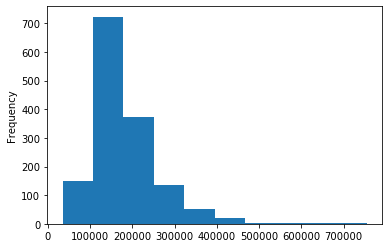

In [24]:
dataset.SalePrice.plot(kind = 'hist')

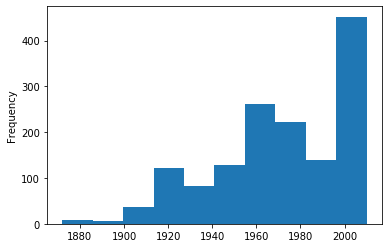

In [50]:
# Your code goes here
dataset.YearBuilt.plot(kind = 'hist')

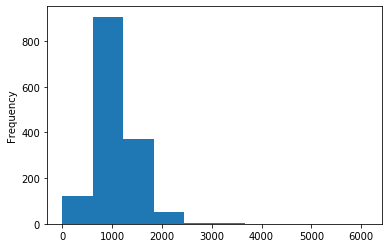

In [31]:
# Your code goes here
dataset.TotalBsmtSF.plot(kind = 'hist')

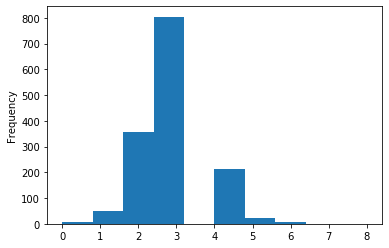

In [34]:
# Your code goes here
dataset['BedroomAbvGr'].plot(kind = 'hist')

<b>Task 2.2</b> Explain what is the shape of your data, what distribution does it look like?
 (<span style="color:#00a0e5"> Опишите форму ваших данных, к какому распределению она подходит?</span>)

<p style="text-align:right; color:#1460AA;">+10
    points </p>

1-plot is lognormal

2-plot is more like beta

<b>TASK 3</b> Visualizations

<b>Task 3.1</b> Visualize your categorical features and wrire down the summary (<span style="color:#00a0e5"> Визуализируйте ваши категориальные данные, напишите выводы по визуализациям</span>)

<p style="text-align:right; color:#1460AA;">+20
    points </p>

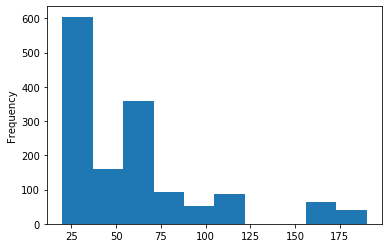

In [64]:
# Your code goes here
dataset.MSSubClass.plot(kind = "hist")

Summary: 
    there is the most data in the range 20-30, also there is no data from MSSubClass = 120-160

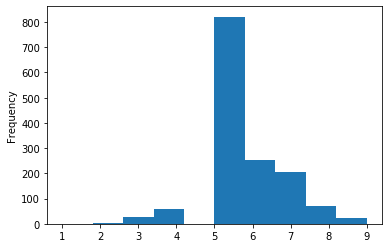

In [66]:
# Your code goes here
dataset.OverallCond.plot(kind = "hist")

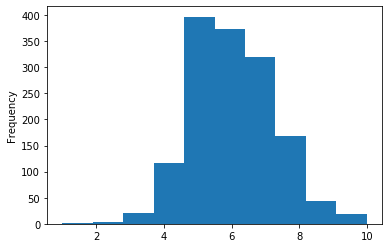

In [65]:
# Your code goes here
dataset.OverallQual.plot(kind = "hist")

Summary:
    Look like gamma distribution; 
    This diagram shows that the Overall material and finish quality mostly average and good, few materials with very low quality

<b> Task 3.2 </b> Create boxplots for any 5 numerical features and investigate if there are possible outliers

<p style="text-align:right; color:#1460AA;">+20
    points </p>

Example, 

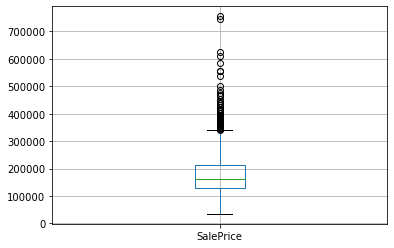

In [30]:
dataset.boxplot('SalePrice')

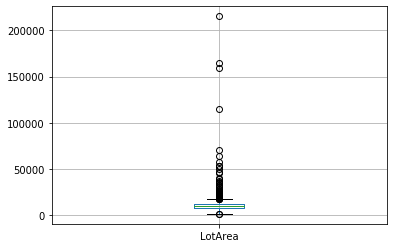

In [41]:
# Your code goes here
dataset.boxplot('LotArea')

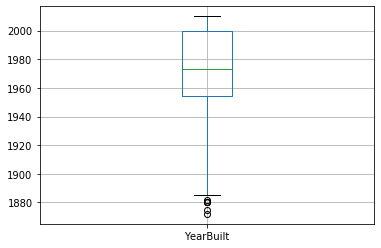

In [42]:
# Your code goes here
dataset.boxplot('YearBuilt')

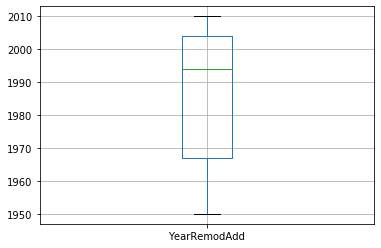

In [43]:
# Your code goes here
dataset.boxplot('YearRemodAdd')

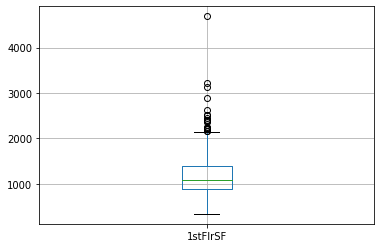

In [44]:
dataset.boxplot('1stFlrSF')

<b><span style="font-size:20px; color:orange">G</span>reat!</b> You did awesome job! <br/> <br/> But don't stop practicing, remember - since you will be working with data, you have to understand its nature.
<br/> <br/> <b>Now</b> go to the Quiz 04
<br/> 